In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import librosa

In [2]:
df=pd.read_csv(r'Respiratory_Sound_Database\diagnosis_details.csv')
df.head()

,patient_id,diagnosis,recording_index,chest_location,acquisition_mode,recording_equipment
0,101,URTI,1b1,Al,sc,Meditron
1,101,URTI,1b1,Pr,sc,Meditron
2,102,Healthy,1b1,Ar,sc,Meditron
3,103,Asthma,2b2,Ar,mc,LittC2SE
4,104,COPD,1b1,Al,sc,Litt3200


In [3]:
df.isnull().sum()

patient_id             0
diagnosis              0
recording_index        0
chest_location         0
acquisition_mode       0
recording_equipment    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    int64 
 1   diagnosis            920 non-null    object
 2   recording_index      920 non-null    object
 3   chest_location       920 non-null    object
 4   acquisition_mode     920 non-null    object
 5   recording_equipment  920 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.2+ KB


In [8]:
#for prediction we only need first wo columns
df=df.iloc[:,:2]
df.head(1)

,patient_id,diagnosis
0,101,URTI


In [14]:
count=df['diagnosis'].value_counts()
count

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
LRTI                2
Asthma              1
Name: diagnosis, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'COPD'),
  Text(1, 0, 'Pneumonia'),
  Text(2, 0, 'Healthy'),
  Text(3, 0, 'URTI'),
  Text(4, 0, 'Bronchiectasis'),
  Text(5, 0, 'Bronchiolitis'),
  Text(6, 0, 'LRTI'),
  Text(7, 0, 'Asthma')])

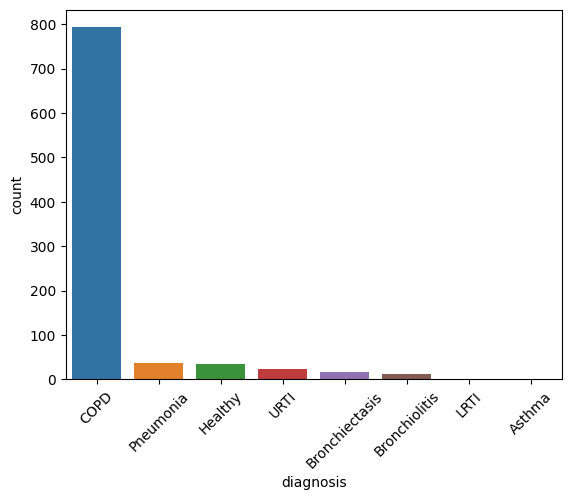

In [15]:
#we have to deal with the imbalance in our dataset
sns.countplot(x='diagnosis',data=df,order=count.index)
plt.xticks(rotation=45)

In [28]:
audio_files=glob.glob(r'Respiratory_Sound_Database\audio_and_txt_files\*.wav')
audio_files[:5]

['Respiratory_Sound_Database\\audio_and_txt_files\\101_1b1_Al_sc_Meditron.wav',
 'Respiratory_Sound_Database\\audio_and_txt_files\\101_1b1_Pr_sc_Meditron.wav',
 'Respiratory_Sound_Database\\audio_and_txt_files\\102_1b1_Ar_sc_Meditron.wav',
 'Respiratory_Sound_Database\\audio_and_txt_files\\103_2b2_Ar_mc_LittC2SE.wav',
 'Respiratory_Sound_Database\\audio_and_txt_files\\104_1b1_Al_sc_Litt3200.wav']

In [39]:
mfccs_features=[]
length=[]
max_pad_len=926
def feature_extraction(file):
# Load the .wav file
    audio, sample_rate = librosa.load(file)
    # Extract the MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=52)
    
    # If the array is shorter than max_pad_len, pad it with zeros
    if (mfccs.shape[1] < max_pad_len):
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    # If the array is longer than max_pad_len, truncate it
    elif (mfccs.shape[1] > max_pad_len):
        mfccs = mfccs[:, :max_pad_len]
        
    
    return mfccs
for i in audio_files:
    mfccs=feature_extraction(i)
    mfccs_features.append(mfccs)
    # length.append(mfccs.shape[1])
    


In [38]:
#check length size of mfccs_features
print(f'max length is {max(length)} min length is {min(length)} average length is {np.mean(length)}')
#max length is 3713 min length is 339 average length is 926.2423913043478
#we will pad the mfccs_features to 926

max length is 3713 min length is 339 average length is 926.2423913043478


In [40]:
mfccs_features=np.array(mfccs_features)
mfccs_features.shape


(920, 52, 926)